# Spaceship Titanic

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.preprocessing import MinMaxScaler

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

path = './Data'

In [2]:
sub = pd.read_csv(f'{path}/92482_sample_submission.csv')

In [3]:
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1459 non-null   int64  
 1   SalePrice  1459 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 22.9 KB


In [4]:
sub.head()

'''
SalePrices? 
Digby and Ginger proceed to drink the contents of the glasses on the table:
Digby theme voice-over: dun dun dun,
    dun da-dun-da-dun dun dun, 
    dun da-dun-da-dun-da-dun dun dun,
    dun dun dun da-dun da-dun da-daaaaaaaa (etc) 
Digby and Ginger then eat all the crisps as well:
Digby voice-over: On a lonely planet, spinning it's way to damnation,
    amid the fear and despair of a broken human race,
    who is left to fight for all that is good and pure and gets you smashed for under a fiver?

    Yes, it's the surprising adventures of me, Sir Digby Chicken Caesar!
'''

"\nSalePrices? \nDigby and Ginger proceed to drink the contents of the glasses on the table:\nDigby theme voice-over: dun dun dun,\n    dun da-dun-da-dun dun dun, \n    dun da-dun-da-dun-da-dun dun dun,\n    dun dun dun da-dun da-dun da-daaaaaaaa (etc) \nDigby and Ginger then eat all the crisps as well:\nDigby voice-over: On a lonely planet, spinning it's way to damnation,\n    amid the fear and despair of a broken human race,\n    who is left to fight for all that is good and pure and gets you smashed for under a fiver?\n\n    Yes, it's the surprising adventures of me, Sir Digby Chicken Caesar!\n"

In [15]:
df = pd.read_csv(f'{path}/79253_train.csv')
t_df = pd.read_csv(f'{path}/19353_test.csv')

#df.head() # looks like realestate
#df.info() # loads of missing values

foo = ['Electrical_Mix', 'PoolQC_Fa', 'SalePrice', 'Exterior1st_ImStucc', '3SsnPorch', 'HouseStyle_2.5Fin',
       'GarageQual_Fa', 'RoofMatl_Membran', 'Heating_OthW', 'Condition2_RRAn', 'RoofMatl_CompShg', 'MiscFeature_TenC',
       'Id', 'Heating_GasA', 'Utilities_NoSeWa', 'Condition2_RRAe', 'Exterior2nd_Other', 'Condition2_RRNn',
       'RoofMatl_Metal', 'Exterior1st_Stone', 'RoofMatl_Roll']

#foo = []



def cleanse(df):
    df['ScreenPorch'] = df['ScreenPorch'] + df['3SsnPorch'] 
    df = df.drop(columns=['3SsnPorch', 'Id'])
    target = df['SalePrice']
    feature = df.drop(columns=foo, axis=1, errors='ignore')
    feature = df.drop(columns=['SalePrice'])
    feature = pd.get_dummies(feature, drop_first = True)

    feature.fillna(0, inplace=True)
    return target, feature

def t_cleanse(df):
    df['ScreenPorch'] = df['ScreenPorch'] + df['3SsnPorch'] 
    feature = df.drop(columns=['3SsnPorch', 'Id'])
    feature = df.drop(columns=foo, axis=1, errors='ignore')
    feature = pd.get_dummies(feature, drop_first = True)
    
    feature.fillna(0, inplace=True)

    return (feature)

train_target, train_feature = cleanse(df)
test_feature = t_cleanse(t_df)

train_feature.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
0          2003       196.0         706           0  ...               0   
1          1976         0.0         978           0  ...               0   
2          2002       162.0         486           0  ...               0   
3          1970         0.0         216           0  ...               0   
4          2000       350.0         655           0  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 244 columns]

In [16]:
li1 = df.columns.tolist()
li2 = t_df.columns.tolist()

len(set(li1).symmetric_difference(set(li2)))

1

In [164]:
f_eng = ['MSSubClass', 'BsmtUnfSF', 'BsmtHalfBath', 'HalfBath', 'LandContour_Low', 'Neighborhood_Blueste',
         'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_Veenker', 'Condition1_Feedr', 'CentralAir_Y', 'PavedDrive_P',
        'Alley_Pave', 'GarageArea', 'OpenPorchSF', 'LotConfig_Inside', 'Exterior1st_MetalSd', 'Exterior1st_CBlock', 'Exterior1st_BrkComm',
         'ExterCond_Gd', 'ExterCond_Po', 'Heating_Grav', 'SaleType_WD', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr',
         'Condition2_Norm', 'HouseStyle_Sfoyer', 'RoofMatl_WdShake', 'Exterior1st_CemntBd', 'Exterior1st_Plywood', 'Exterior2nd_Brk Cmn',
         'Exterior2nd_BrkFace', 'Exterior2nd_Plywood', 'Exterior2nd_Wd Shng', 'ExterQual_Fa', 'BsmtFinType1_Unf', 'BsmtFinType2_Rec',
         'Electrical_FuseF', 'Functional_Maj2', 'Functional_Min1', 'Functional_Mod', 'FireplaceQu_TA', 'GarageCond_Gd', 'MiscFeature_Shed',
         'SaleType_ConLw' 'SaleCondition_AdjLand', 'SaleCondition_Family', 'HouseStyle_Sfoyer', 'RoofStyle_Mansard', 'RoofStyle_Shed',
         'RoofMatl_Tar&Grv', 'Exterior2nd_AsphShn', 'Exterior2nd_Cblock', 'BsmtFinType2_BLQ', 'BsmtFinType1_LwQ', 'SaleCondition_AdjLand', 'SaleType_ConLw',
         'Neighborhood_SawyerW', 'HouseStyle_Sfoyer', 'Exterior2nd_Cblock', 'BsmtCond_Gd', 'HeatingQC_Fa', 'MiscFeature_Othr',
         'YearRemodAdd', 'LowQualFinSF', 'EnclosedPorch', 'MiscVal', 'MoSold', 'YrSold', 'LotShape_Reg', 'LotConfig_FR3', 'Neighborhood_IDOTRR',
         'Neighborhood_MeadowV', 'Neighborhood_NPkVill', 'Neighborhood_SWISU', 'Neighborhood_Somerst', 'Neighborhood_Timber', 'Condition1_PosA',
         'HouseStyle_2', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gambrel', 'Exterior1st_AsphShn', 'Exterior1st_HdBoard', 'Exterior1st_Stucco',
         'Exterior1st_WdShing', 'Exterior2nd_CBlock', 'Exterior2nd_HdBoard', 'Exterior2nd_MetalSd', 'MasVnrType_BrkFace', 'ExterCond_Fa', 'ExterCond_TA',
         'Foundation_PConc', 'Foundation_Stone', 'Foundation_Wood', 'BsmtExposure_Mn', 'BsmtFinType1_BLQ', 'BsmtFinType1_Rec', 'BsmtFinType2_GLQ', 'BsmtFinType2_LwQ',
         'Heating_GasW', 'HeatingQC_Po', 'HeatingQC_TA', 'Electrical_FuseP', 'Electrical_SBrkr', 'Functional_Min2', 'FireplaceQu_Gd', 'GarageFinish_Unf', 'GarageQual_TA',
         'GarageCond_Fa', 'GarageCond_Po', 'GarageCond_TA', 'PavedDrive_Y', 'Fence_GdWo', 'Fence_MnPrv', 'Fence_MnWw', 'SaleType_ConLI', 'SaleType_Oth', 'SaleCondition_Partial',
         'GrLivArea', 'Neighborhood_CollgCr', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Unf', 'Exterior1st_VinylSd', 'Foundation_CBlock', 'BsmtCond_Po', 'FireplaceQu_Fa',
         'GarageType_Basment', 'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd', 'GarageQual_Po', 'Exterior2nd_Wd Sdng',
         'GarageType_Attchd', 'LotShape_IR2', 'Exterior1st_Wd Sdng', 'Heating_Wall'
        ]

li1 = train_feature.columns.tolist()
li2 = test_feature.columns.tolist()

dl = list(set(li1).symmetric_difference(set(li2)))
train_feature = train_feature.drop(columns=foo, axis=1, errors='ignore')
test_feature = test_feature.drop(columns=foo, axis=1, errors='ignore')

train_feature = train_feature.drop(columns=f_eng, axis=1, errors='ignore')
test_feature = test_feature.drop(columns=f_eng, axis=1, errors='ignore')

In [140]:
li1 = train_feature.columns.tolist()
li2 = test_feature.columns.tolist()

len(set(li1).symmetric_difference(set(li2)))

0

In [141]:
# explore data
df.duplicated().sum()

col= df.columns

# first order
col=col.drop(['Id', 'SalePrice', 'LotArea' ])

# to norm
col=col.drop(['MasVnrArea', 'LotFrontage'])

# columns to assume zero if undefined
col=col.drop(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
              '1stFlrSF', '2ndFlrSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
              'EnclosedPorch', 'LowQualFinSF', 'PoolArea'])

# validate to a value
col=col.drop(['GrLivArea', 'TotRmsAbvGrd'])

# to catagory
col=col.drop(['Neighborhood', 'Exterior1st', 'Exterior2nd', 'MSSubClass',
              'MoSold', 'Condition1', 'Condition2', 'RoofMatl', 'Functional',
              'HouseStyle', 'SaleType', 'MSZoning', 'LotShape', 'LandContour',
             'LotConfig', 'BldgType', 'RoofStyle'])

# map 3SsnPorch to ScreenPorch, assume zero if undefined
col=col.drop(['3SsnPorch', 'ScreenPorch'])

# no change
col=col.drop(['OverallQual', 'YearBuilt', 'GarageYrBlt', 'MiscVal', 'YearRemodAdd', 'OverallCond',
              'BedroomAbvGr', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenAbvGr', 'Fireplaces', 'FullBath',
             'HalfBath', 'GarageCars', 'YrSold'])

# map nan to None then to catagory
col=col.drop(['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
              'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageQual',
              'GarageCond', 'Fence', 'MiscFeature', 'Alley', 'GarageFinish', 'PoolQC',
              'Street', 'Utilities', 'LandSlope', 'ExterQual', 'ExterCond', 'Foundation',
              'Heating', 'HeatingQC', 'KitchenQual', 'PavedDrive', 'SaleCondition', 'CentralAir'
             ])

#df.nunique()

In [147]:
def report_corr(df, threshold=.001):
    assert (threshold<=1 and threshold > 0), "Threshold is invalid.  The valid range is between 0 and 1."
    corr_mat = df.corr()
    sol = (corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
                      .stack()
                      .sort_values(ascending=False))

    for index, value in sol.items():
        if abs(value) >= threshold:
            print('%1.2f: %s vs %s' %(value, index[0], index[1]))
    
report_corr(df,.60) 

0.88: GarageCars vs GarageArea
0.83: YearBuilt vs GarageYrBlt
0.83: GrLivArea vs TotRmsAbvGrd
0.82: TotalBsmtSF vs 1stFlrSF
0.79: OverallQual vs SalePrice
0.71: GrLivArea vs SalePrice
0.69: 2ndFlrSF vs GrLivArea
0.68: BedroomAbvGr vs TotRmsAbvGrd
0.65: BsmtFinSF1 vs BsmtFullBath
0.64: YearRemodAdd vs GarageYrBlt
0.64: GarageCars vs SalePrice
0.63: GrLivArea vs FullBath
0.62: GarageArea vs SalePrice
0.62: 2ndFlrSF vs TotRmsAbvGrd
0.61: TotalBsmtSF vs SalePrice
0.61: 2ndFlrSF vs HalfBath
0.61: 1stFlrSF vs SalePrice
0.60: OverallQual vs GarageCars


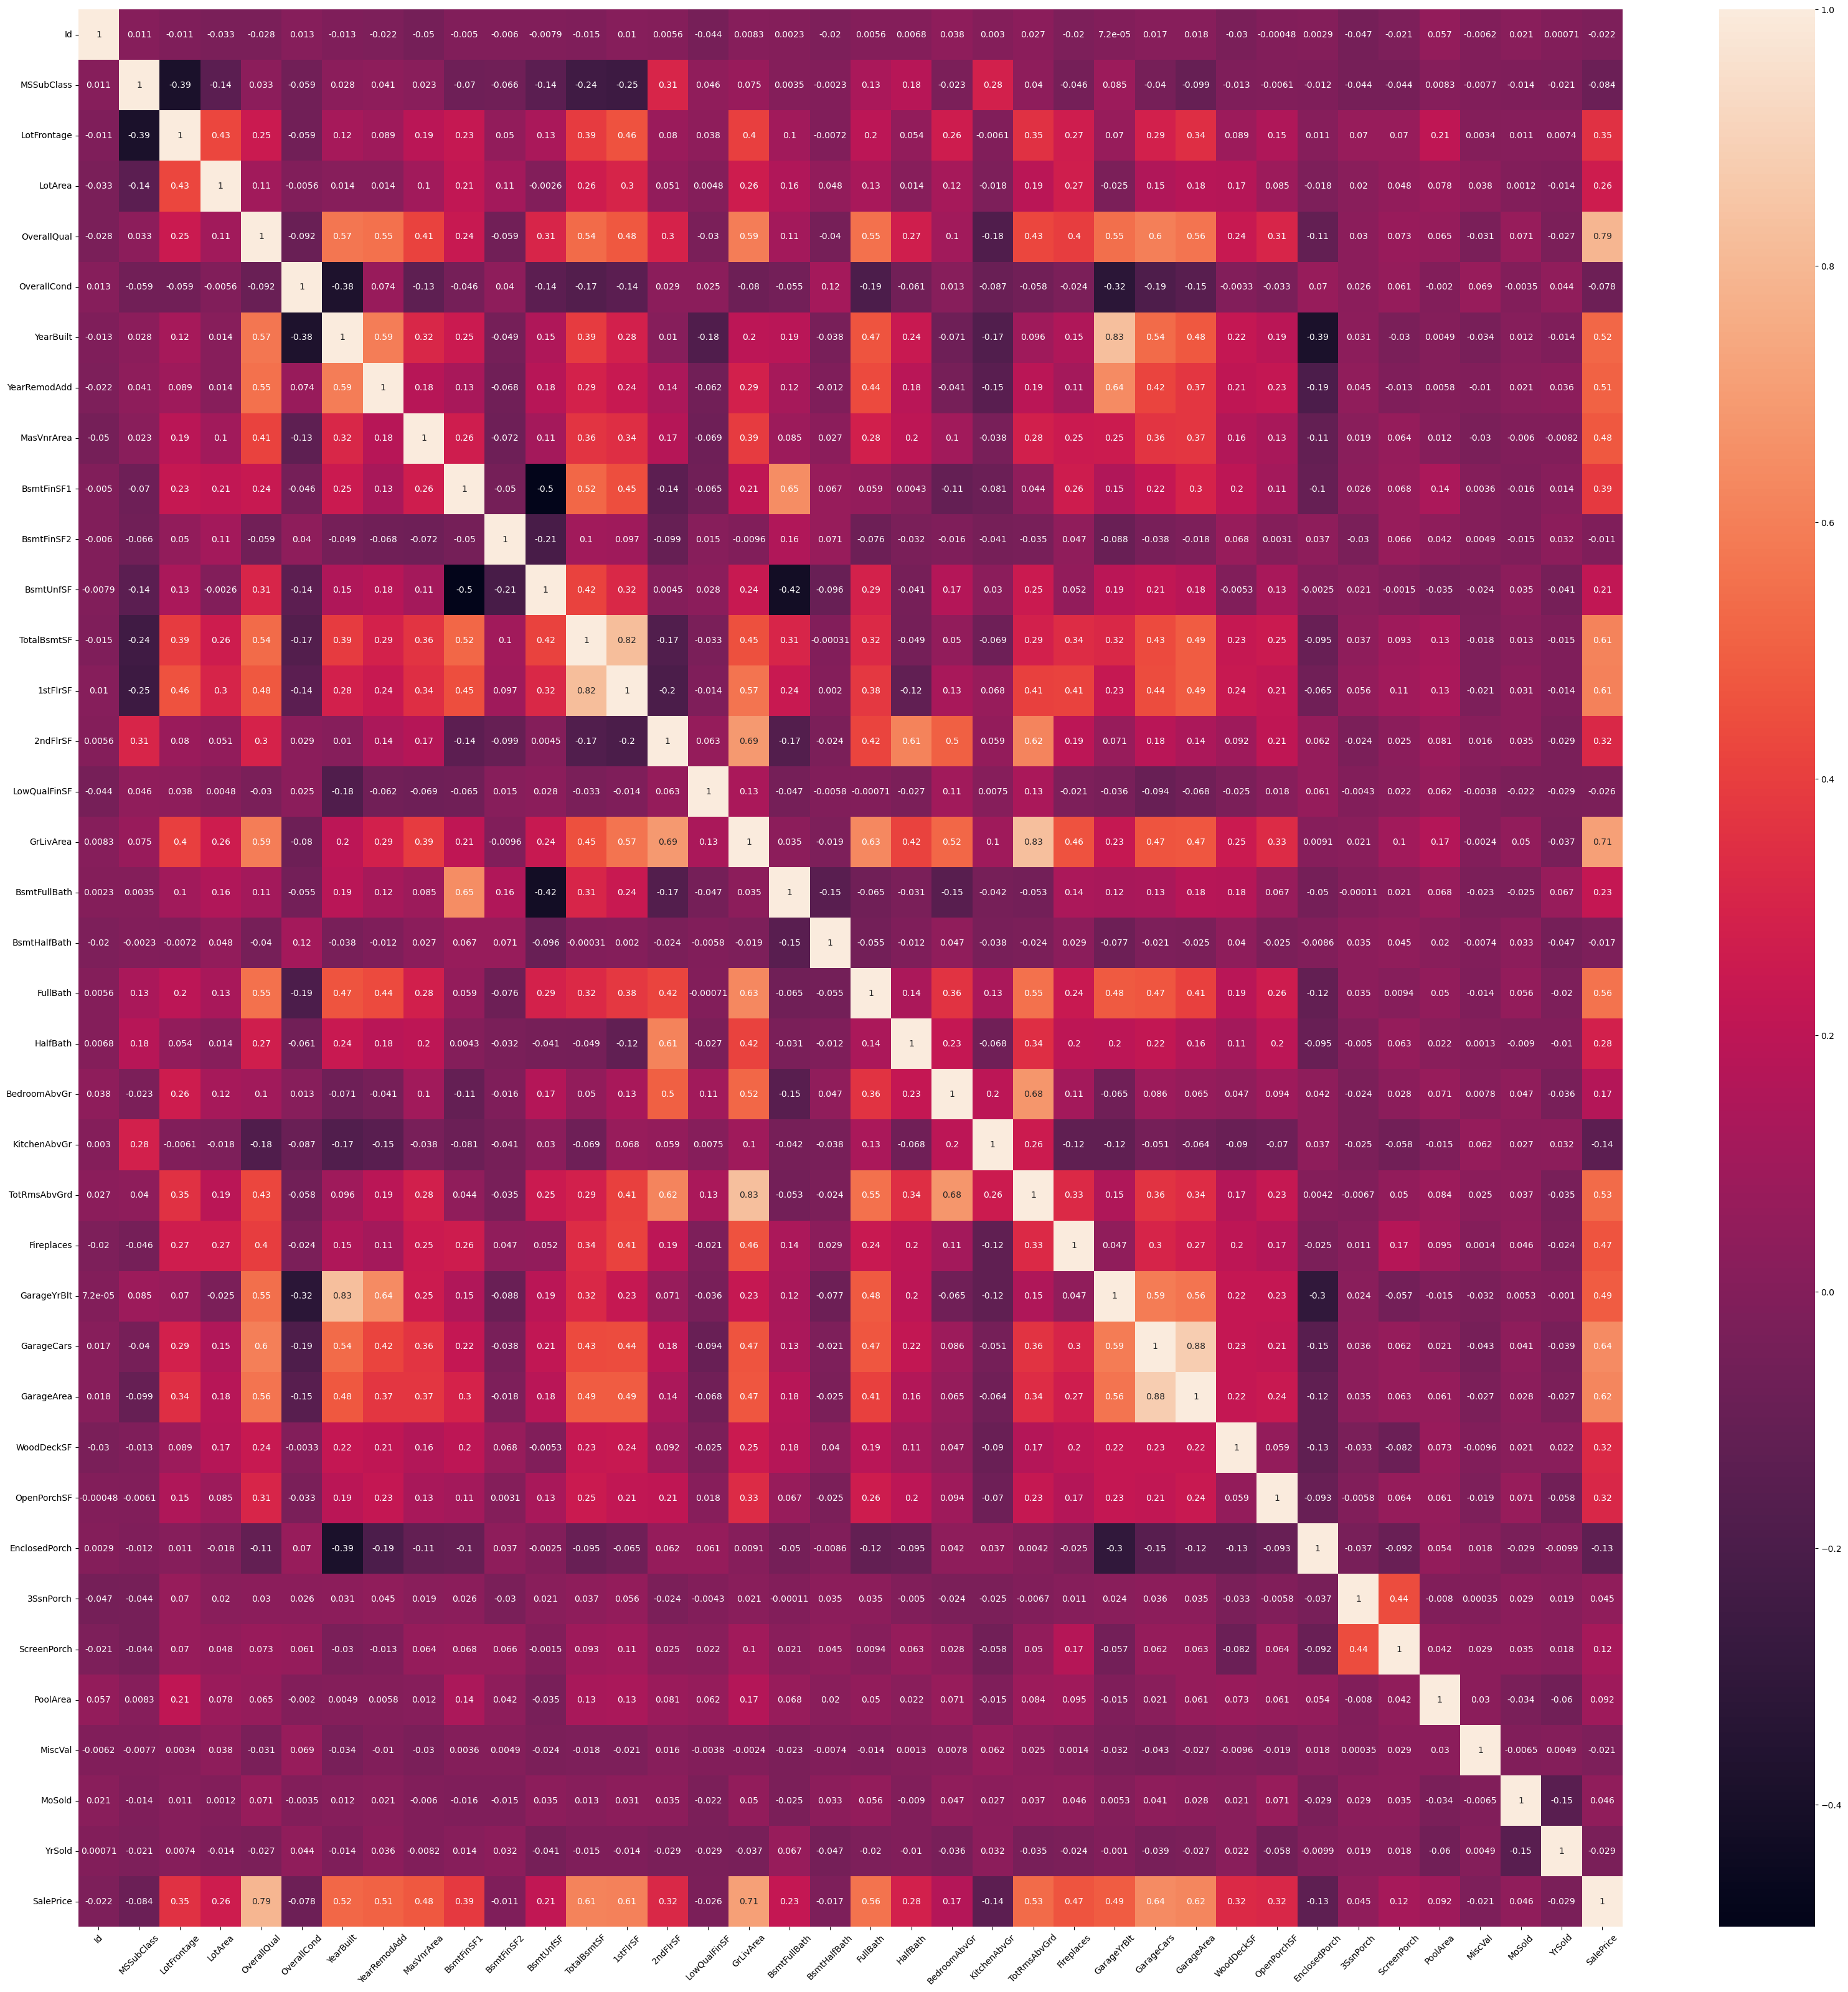

In [143]:
fig = plt.figure(figsize = (40,40))
sns.heatmap(df.corr(), annot = True);
plt.xticks(rotation = 45);
plt.show()

In [108]:
for c in col:
    n = df[c].nunique()
    if True:
        print(f'{c}: {df[c].nunique()}')
        print(f'{sorted(df[c].unique())}')
        print('='*50), unique

In [109]:
if False:
    df.plot(kind='box', subplots=True, sharey=False, figsize=(40,10), rot=90)
    plt.subplots_adjust(wspace=10)
    plt.show()

# Scale Training data

In [165]:
# Creating an instance of the MinMaxScaler
scaler = MinMaxScaler()

# Applying fit_transform on the training features data
train_features_scaled = scaler.fit_transform(train_feature)

# The above scaler returns the data in array format, below we are converting it back to pandas DataFrame
train_features_scaled = pd.DataFrame(train_features_scaled, index = train_feature.index, columns = train_feature.columns)

train_features_scaled.head()

LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  MasVnrArea  \
0     0.207668  0.033420     0.666667        0.500   0.949275     0.12250   
1     0.255591  0.038795     0.555556        0.875   0.753623     0.00000   
2     0.217252  0.046507     0.666667        0.500   0.934783     0.10125   
3     0.191693  0.038561     0.666667        0.500   0.311594     0.00000   
4     0.268371  0.060576     0.777778        0.500   0.927536     0.21875   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  FireplaceQu_Po  \
0    0.125089         0.0     0.140098  0.119780  ...             0.0   
1    0.173281         0.0     0.206547  0.212942  ...             0.0   
2    0.086109         0.0     0.150573  0.134465  ...             0.0   
3    0.038271         0.0     0.123732  0.143873  ...             0.0   
4    0.116052         0.0     0.187398  0.186095  ...             0.0   

   GarageFinish_RFn  GarageQual_Gd  PoolQC_Gd  SaleType_CWD  SaleType_Con  \
0               1.0            0.0        0.0           0.0           0.0   
1               1.0            0.0        0.0           0.0           0.0   
2               1.0            0.0        0.0           0.0           0.0   
3               0.0            0.0        0.0           0.0           0.0   
4               1.0            0.0        0.0           0.0           0.0   

   SaleType_ConLD  SaleType_New  SaleCondition_Alloca  SaleCondition_Normal  
0             0.0           0.0                   0.0                   1.0  
1             0.0           0.0                   0.0                   1.0  
2             0.0           0.0                   0.0                   1.0  
3             0.0           0.0                   0.0                   0.0  
4             0.0           0.0                   0.0                   1.0  

[5 rows x 96 columns]

In [166]:
# Adding the intercept term
train_features_scaled = sm.add_constant(train_features_scaled)

# Calling the OLS algorithm on the train features and the target variable
ols_model_0 = sm.OLS(train_target, train_features_scaled)

# Fitting the Model
ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

# to drop
# [

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     138.8
Date:                Mon, 06 Mar 2023   Prob (F-statistic):               0.00
Time:                        14:52:32   Log-Likelihood:                -16809.
No. Observations:                1460   AIC:                         3.381e+04
Df Residuals:                    1363   BIC:                         3.432e+04
Df Model:                          96                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.031e+04 

# Test data
We're not going to do any tuning...

In [167]:
#Applying transform on the test data
len(test_feature.columns.tolist())- len(train_feature.columns.tolist())

test_features_scaled = scaler.transform(test_feature)
test_features_scaled = pd.DataFrame(test_features_scaled, columns = test_feature.columns)
test_features_scaled = sm.add_constant(test_features_scaled)
test_features_scaled.head()

const  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    1.0     0.255591  0.048246     0.444444        0.625   0.644928   
1    1.0     0.258786  0.060609     0.555556        0.625   0.623188   
2    1.0     0.236422  0.058566     0.444444        0.500   0.905797   
3    1.0     0.249201  0.040562     0.555556        0.625   0.913043   
4    1.0     0.137380  0.017318     0.777778        0.500   0.869565   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  ...  FireplaceQu_Po  \
0      0.0000    0.082920    0.097693     0.144354  ...             0.0   
1      0.0675    0.163536    0.000000     0.217512  ...             0.0   
2      0.0000    0.140149    0.000000     0.151882  ...             0.0   
3      0.0125    0.106662    0.000000     0.151555  ...             0.0   
4      0.0000    0.046598    0.000000     0.209493  ...             0.0   

   GarageFinish_RFn  GarageQual_Gd  PoolQC_Gd  SaleType_CWD  SaleType_Con  \
0               0.0            0.0        0.0           0.0           0.0   
1               0.0            0.0        0.0           0.0           0.0   
2               0.0            0.0        0.0           0.0           0.0   
3               0.0            0.0        0.0           0.0           0.0   
4               1.0            0.0        0.0           0.0           0.0   

   SaleType_ConLD  SaleType_New  SaleCondition_Alloca  SaleCondition_Normal  
0             0.0           0.0                   0.0                   1.0  
1             0.0           0.0                   0.0                   1.0  
2             0.0           0.0                   0.0                   1.0  
3             0.0           0.0                   0.0                   1.0  
4             0.0           0.0                   0.0                   1.0  

[5 rows x 97 columns]

In [168]:
train_features_scaled.head()

const  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    1.0     0.207668  0.033420     0.666667        0.500   0.949275   
1    1.0     0.255591  0.038795     0.555556        0.875   0.753623   
2    1.0     0.217252  0.046507     0.666667        0.500   0.934783   
3    1.0     0.191693  0.038561     0.666667        0.500   0.311594   
4    1.0     0.268371  0.060576     0.777778        0.500   0.927536   

   MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  ...  FireplaceQu_Po  \
0     0.12250    0.125089         0.0     0.140098  ...             0.0   
1     0.00000    0.173281         0.0     0.206547  ...             0.0   
2     0.10125    0.086109         0.0     0.150573  ...             0.0   
3     0.00000    0.038271         0.0     0.123732  ...             0.0   
4     0.21875    0.116052         0.0     0.187398  ...             0.0   

   GarageFinish_RFn  GarageQual_Gd  PoolQC_Gd  SaleType_CWD  SaleType_Con  \
0               1.0            0.0        0.0           0.0           0.0   
1               1.0            0.0        0.0           0.0           0.0   
2               1.0            0.0        0.0           0.0           0.0   
3               0.0            0.0        0.0           0.0           0.0   
4               1.0            0.0        0.0           0.0           0.0   

   SaleType_ConLD  SaleType_New  SaleCondition_Alloca  SaleCondition_Normal  
0             0.0           0.0                   0.0                   1.0  
1             0.0           0.0                   0.0                   1.0  
2             0.0           0.0                   0.0                   1.0  
3             0.0           0.0                   0.0                   0.0  
4             0.0           0.0                   0.0                   1.0  

[5 rows x 97 columns]

In [171]:
# These test predictions will be on a log scale
test_predictions = ols_res_0.predict(test_features_scaled)
test_predictions


# We are converting the log scale predictions to its original scale
#test_predictions_inverse_transformed = np.exp(test_predictions)

#test_predictions_inverse_transformed



0       107561.944327
1       150351.360160
2       177274.749560
3       191866.683804
4       206205.374542
            ...      
1454     85179.070758
1455     76594.350017
1456    160891.615427
1457    113924.499721
1458    223875.723819
Length: 1459, dtype: float64

In [162]:
train_target.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [172]:
s_df = pd.DataFrame([t_df.Id]).transpose()
s_df['SalePrice'] = test_predictions

s_df.to_csv(f'{path}/sub_BrentThorne.csv', index=False)
s_df.head()

Id      SalePrice
0  1461  107561.944327
1  1462  150351.360160
2  1463  177274.749560
3  1464  191866.683804
4  1465  206205.374542

In [173]:
#sub2 = pd.read_csv(f'{path}/sub_BrentThorne2.csv')
#sub2.head()

Id      SalePrice
0  1461  107561.944327
1  1462  150351.360160
2  1463  177274.749560
3  1464  191866.683804
4  1465  206205.374542

In [159]:
sub.head()

Id      SalePrice
0  1461  169277.052498
1  1462  187758.393989
2  1463  183583.683570
3  1464  179317.477511
4  1465  150730.079977